<a href="https://colab.research.google.com/github/guillejv5/ML-101/blob/master/temp_Clase5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import torch
import torch.nn as nn
import torch.optim as optim

from torchvision import utils
from torchvision import datasets
from torchvision import transforms

from PIL import Image
import urllib.request as request
from matplotlib import pyplot as plt
#torch.set_printoptions(edgeitems=2) #default 3
#torch.manual_seed(123)

# Construyendo modelo
---


In [26]:
data_path = 'data/'
full_data_set = datasets.CIFAR10(data_path, train=True, download=True,
                          transform=transforms.Compose([
                              transforms.ToTensor(),
                              transforms.Normalize((0.4915, 0.4823, 0.4468),
                                                   (0.2470, 0.2435, 0.2616))
                          ]))

full_validation_set = datasets.CIFAR10(data_path, train=False, download=True,
                          transform=transforms.Compose([
                              transforms.ToTensor(),
                              transforms.Normalize((0.4915, 0.4823, 0.4468),
                                                   (0.2470, 0.2435, 0.2616))
                          ]))

Files already downloaded and verified
Files already downloaded and verified


In [28]:
size = 4
dataloader = torch.utils.data.DataLoader(full_data_set, batch_size=size, shuffle=True, num_workers=2)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


plane
bird
cat
bird


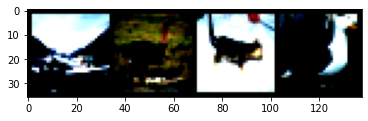

In [29]:
# Generar un iterador sobre nuestro data loader
data_iterator = iter(dataloader)

#Obtener las imagenes y las etiquetas
imgs, labels = data_iterator.next()

#Definicion de clases por defecto
classes = ['plane','car','bird','cat','deer','dog','frog','horse','ship','truck']


plt.imshow(utils.make_grid(imgs).permute(1, 2, 0))

for i in range(size):
  print(classes[labels[i]])

In [30]:
#classes = ['plane','car','bird','cat','deer','dog','frog','horse','ship','truck']
class_names = ['car', 'cat']
## Remapeo de las posiciones por ser un dataset nuevo
label_map = {1: 0, 3: 1}

data_set = [(img, label_map[label]) for img, label in full_data_set if label in [1, 3]]
validation_set = [(img, label_map[label]) for img, label in full_validation_set if label in [1, 3]]

In [31]:
# consultamos cual es el shape
img, label = data_set[20]
img.shape

torch.Size([3, 32, 32])

In [8]:
# Tangente hiperbolica
# necesitamos dos posibles significados
# ocupamos poner un numero de neuronas o capas.
model = nn.Sequential(
            nn.Linear(3 * 32 * 32, 512),
            nn.Tanh(),
            nn.Linear(512, 2))

# Tanh significa tangente hiperbolica

In [9]:
#El resultado final necesito que sea un probabilidad para ello utilizamos softmax

def sigmoid(x):
  return 1 / (1 + torch.exp(-x))

In [10]:
x = torch.tensor([1.0, 2.0, 3.0])

sigmoid(x)

tensor([0.7311, 0.8808, 0.9526])

In [41]:
def softmax(x):
  return torch.exp(x) / torch.exp(x).sum()

In [42]:
x = torch.tensor([1.0,2.0,3.0])

In [43]:
softmax(x).sum()

tensor(1.)

In [33]:
model = nn.Sequential(
            nn.Linear(3 * 32 * 32, 512),
            nn.Tanh(),
            nn.Linear(512, 2),
            nn.Softmax(dim=1)
  )

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


'car'

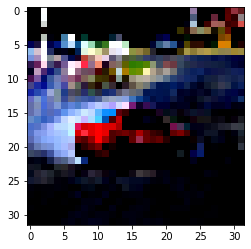

In [44]:
img, label = data_set[20]

plt.imshow(img.permute(1, 2, 0))
class_names[label]

In [45]:
# La salida sobre el modelo necesita ser transformada para que el modelo la entienda
# Ahora el resultado va a ser un tensor

out = model(img.view(-1).unsqueeze(0))
out

tensor([[0.3632, 0.6368]], grad_fn=<SoftmaxBackward>)

In [46]:
_, index = torch.max(out, dim=1)

#Le enviamos la salida

print('->',class_names[label],' model:',class_names[index])

-> car  model: cat


# Implementando un clasificador totalmente conectado
---

In [49]:
model = nn.Sequential(
            nn.Linear(3072, 512),
            nn.Tanh(),
            nn.Linear(512, 2),
            nn.LogSoftmax(dim=1))

loss = nn.NLLLoss()

In [52]:
# Enviamos la misma imagen que en modelo pasado
img, label = data_set[20]

out = model(img.view(-1).unsqueeze(0))

_, index = torch.max(out, dim=1)

print('->',class_names[label],' model:',class_names[index])

#Llamamos la funcion de loss para calcular la desviacion
loss(out, torch.tensor([label]))

-> car  model: cat


tensor(0.8076, grad_fn=<NllLossBackward>)

In [56]:
model = nn.Sequential(
            nn.Linear(3072, 512),
            nn.Tanh(),
            nn.Linear(512, 2),
            nn.LogSoftmax(dim=1))

loss_function = nn.NLLLoss()

learning_rate = 0.01

optimizer = optim.SGD(model.parameters(), lr=learning_rate)

n_epochs = 5

for epoch in range(n_epochs):
    for img, label in data_set:
      # Entrenamiento del modelo y transformacion de la imagen
        out = model(img.view(-1).unsqueeze(0))
        # Calculando cual es la perdida con base en el loss function
        loss = loss_function(out, torch.tensor([label]))
        
        #Borrar los gradientes
        optimizer.zero_grad()
        #Calcular el back propagation
        loss.backward()
        #
        optimizer.step()

    print("Epoch: %d, Loss: %f" % (epoch, float(loss)))

Epoch: 0, Loss: 0.310831
Epoch: 1, Loss: 0.002369
Epoch: 2, Loss: 0.001343
Epoch: 3, Loss: 0.026976
Epoch: 4, Loss: 0.000123


In [58]:
train_loader = torch.utils.data.DataLoader(data_set, batch_size=64, shuffle=True)
# Agregando el train loader

model = nn.Sequential(
            nn.Linear(3072, 512),
            nn.Tanh(),
            nn.Linear(512, 2),
            nn.LogSoftmax(dim=1))


optimizer = optim.SGD(model.parameters(), lr=0.02)

loss_function = nn.NLLLoss()

n_epochs = 100

for epoch in range(n_epochs):
  #Cambiomos el limite del ciclo por el train loader
    for imgs, labels in train_loader:
      # Vamos a traer la imagen y le enviamos la primero posicion del shapa
        outputs = model(imgs.view(imgs.shape[0], -1))
        loss = loss_function(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print("Epoch: %d, Loss: %f" % (epoch, float(loss)))

Epoch: 0, Loss: 0.354832
Epoch: 1, Loss: 0.314424
Epoch: 2, Loss: 0.301168
Epoch: 3, Loss: 0.347662
Epoch: 4, Loss: 0.366654
Epoch: 5, Loss: 0.269823
Epoch: 6, Loss: 0.344940
Epoch: 7, Loss: 0.197809
Epoch: 8, Loss: 0.543548
Epoch: 9, Loss: 0.495046
Epoch: 10, Loss: 0.233267
Epoch: 11, Loss: 0.200498
Epoch: 12, Loss: 0.165272
Epoch: 13, Loss: 0.238738
Epoch: 14, Loss: 0.104721
Epoch: 15, Loss: 0.082875
Epoch: 16, Loss: 0.266691
Epoch: 17, Loss: 0.135755
Epoch: 18, Loss: 0.115704
Epoch: 19, Loss: 0.072204
Epoch: 20, Loss: 0.051756
Epoch: 21, Loss: 0.022295
Epoch: 22, Loss: 0.099782
Epoch: 23, Loss: 0.111526
Epoch: 24, Loss: 0.107917
Epoch: 25, Loss: 0.026845
Epoch: 26, Loss: 0.136269
Epoch: 27, Loss: 0.030011
Epoch: 28, Loss: 0.047103
Epoch: 29, Loss: 0.019843
Epoch: 30, Loss: 0.020433
Epoch: 31, Loss: 0.008204
Epoch: 32, Loss: 0.017900
Epoch: 33, Loss: 0.021090
Epoch: 34, Loss: 0.004324
Epoch: 35, Loss: 0.020537
Epoch: 36, Loss: 0.011934
Epoch: 37, Loss: 0.021444
Epoch: 38, Loss: 0.001

In [60]:
val_loader = torch.utils.data.DataLoader(validation_set, batch_size=64, shuffle=False)

correct = 0
total = 0

#Utilizamos el no grad para que ignoremos los gradientes
with torch.no_grad():
    for imgs, labels in val_loader:
        outputs = model(imgs.view(imgs.shape[0], -1))
        _, predicted = torch.max(outputs, dim=1)
        total += labels.shape[0]

        correct += int((predicted == labels).sum())
      
print("Accuracy: %f" % (correct / total))

Accuracy: 0.870500


In [62]:
#Estamos usando el de validacion no el de entrenamiento
img, label = validation_set[20]
out = model(img.view(-1).unsqueeze(0))
_, index = torch.max(out, dim=1)
out

tensor([[-4.7684e-07, -1.4650e+01]], grad_fn=<LogSoftmaxBackward>)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


->:  car  model: car


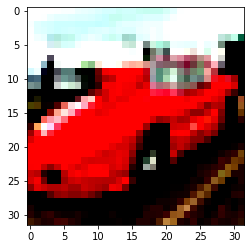

In [63]:
# Resultado es un indice entonces ahora podemos imprimir ese indice
print('->: ',class_names[label],' model:',class_names[index])
plt.imshow(img.permute(1, 2, 0))
plt.show()